# Iris Flowers Classification

## importing packages

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection  import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

## exploring dataset

In [2]:
data=pd.read_csv('iris.data',header=None)

In [3]:
data.shape

(150, 5)

In [4]:
data.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
columns=['sepal_length','sepal_width','petal_length','petal_width','class']
data.columns=columns

In [6]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
data.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class'], dtype='object')

In [10]:
data.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
class            object
dtype: object

In [11]:
data.keys()

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class'], dtype='object')

In [12]:
data.count()

sepal_length    150
sepal_width     150
petal_length    150
petal_width     150
class           150
dtype: int64

In [13]:
print(data['class'].unique())

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [14]:
data.groupby('class').size()

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

## visualising and analysing the data through scatter plot, histogram, boxplot, countplot and heatmap

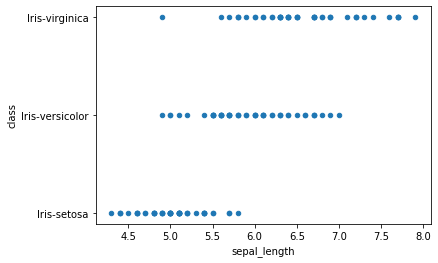

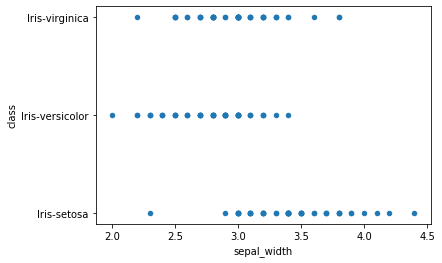

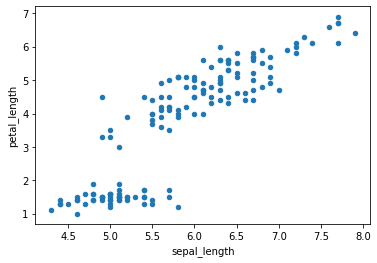

In [15]:
data.plot(kind='scatter',x='sepal_length',y='class')
data.plot(kind='scatter',x='sepal_width',y='class')
data.plot(kind='scatter',x='sepal_length',y='petal_length')

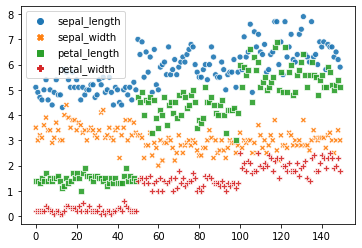

In [16]:
z=data.drop('class',axis=1)
sns.scatterplot(data=z,alpha=0.9)

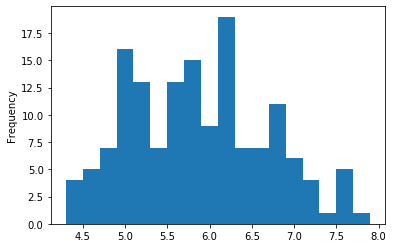

In [17]:
data['sepal_length'].plot.hist(bins=18)

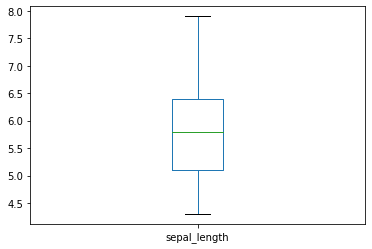

In [18]:
data['sepal_length'].plot.box()

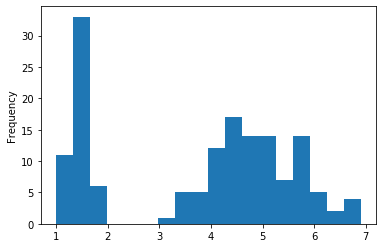

In [19]:
data['petal_length'].plot.hist(bins=18)

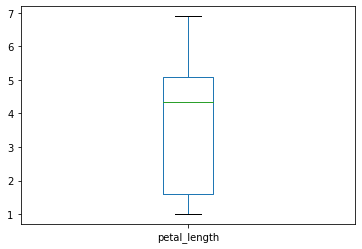

In [20]:
data['petal_length'].plot.box()

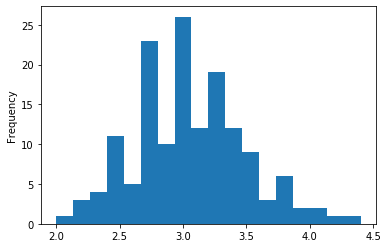

In [21]:
data['sepal_width'].plot.hist(bins=18)

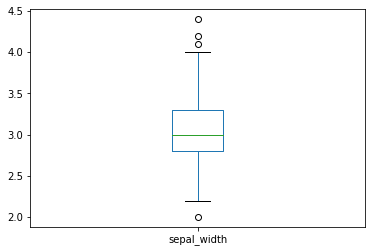

In [22]:
data['sepal_width'].plot.box()

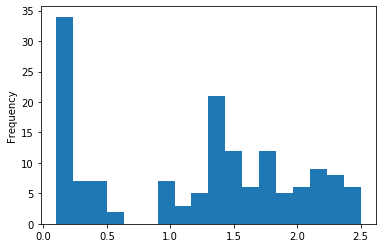

In [23]:
data['petal_width'].plot.hist(bins=18)

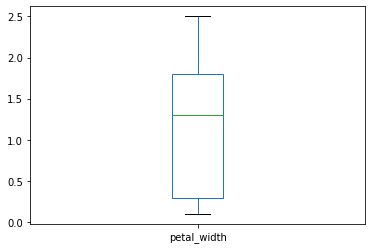

In [24]:
data['petal_width'].plot.box()

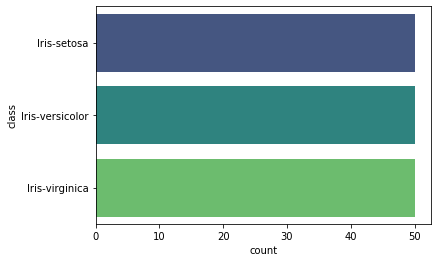

In [25]:
sns.countplot(y='class',data=data,palette="viridis")

In [26]:
data.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


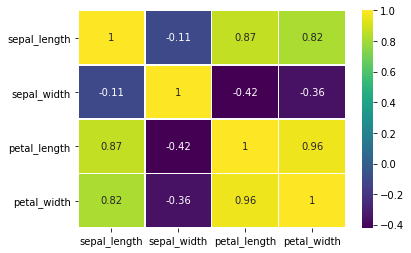

In [27]:
sns.heatmap(data.corr(),annot=True,cmap="viridis",linewidth=0.5)

## predictive modelling using the data

In [28]:
# checking for null values #otherwise replace null values with 0 using data.fillna(0,inplace=True)
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
class           0
dtype: int64

In [29]:
#splitting the data
x=data.drop('class',axis=1)
y=data['class']
x_train, x_test, y_train, y_test=train_test_split(x, y, stratify=y, random_state=0,test_size=0.33)

In [30]:
x

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [31]:
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: class, Length: 150, dtype: object

In [32]:
x_train

,sepal_length,sepal_width,petal_length,petal_width
14,5.8,4.0,1.2,0.2
148,6.2,3.4,5.4,2.3
62,6.0,2.2,4.0,1.0
26,5.0,3.4,1.6,0.4
28,5.2,3.4,1.4,0.2
...,...,...,...,...
143,6.8,3.2,5.9,2.3
95,5.7,3.0,4.2,1.2
29,4.7,3.2,1.6,0.2
145,6.7,3.0,5.2,2.3


In [33]:
x_test

,sepal_length,sepal_width,petal_length,petal_width
142,5.8,2.7,5.1,1.9
12,4.8,3.0,1.4,0.1
147,6.5,3.0,5.2,2.0
39,5.1,3.4,1.5,0.2
136,6.3,3.4,5.6,2.4
48,5.3,3.7,1.5,0.2
51,6.4,3.2,4.5,1.5
21,5.1,3.7,1.5,0.4
65,6.7,3.1,4.4,1.4
36,5.5,3.5,1.3,0.2


In [34]:
y_train

14         Iris-setosa
148     Iris-virginica
62     Iris-versicolor
26         Iris-setosa
28         Iris-setosa
            ...       
143     Iris-virginica
95     Iris-versicolor
29         Iris-setosa
145     Iris-virginica
120     Iris-virginica
Name: class, Length: 100, dtype: object

In [35]:
y_test

142     Iris-virginica
12         Iris-setosa
147     Iris-virginica
39         Iris-setosa
136     Iris-virginica
48         Iris-setosa
51     Iris-versicolor
21         Iris-setosa
65     Iris-versicolor
36         Iris-setosa
113     Iris-virginica
149     Iris-virginica
99     Iris-versicolor
81     Iris-versicolor
89     Iris-versicolor
68     Iris-versicolor
24         Iris-setosa
86     Iris-versicolor
134     Iris-virginica
129     Iris-virginica
6          Iris-setosa
3          Iris-setosa
90     Iris-versicolor
85     Iris-versicolor
110     Iris-virginica
9          Iris-setosa
109     Iris-virginica
103     Iris-virginica
41         Iris-setosa
61     Iris-versicolor
50     Iris-versicolor
139     Iris-virginica
77     Iris-versicolor
88     Iris-versicolor
55     Iris-versicolor
121     Iris-virginica
1          Iris-setosa
54     Iris-versicolor
100     Iris-virginica
67     Iris-versicolor
102     Iris-virginica
98     Iris-versicolor
38         Iris-setosa
23         

1. LOGISTIC MODEL

In [36]:
lreg=LogisticRegression()

In [37]:
#fitting line of best fit for logistic model
lreg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [38]:
#predicting values
pred=lreg.predict(x_test)
print(pred)

['Iris-virginica' 'Iris-setosa' 'Iris-virginica' 'Iris-setosa'
 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica' 'Iris-virginica'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica'
 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-virginica' 'Iris-setosa' 'Iris-virginica' 'Iris-virginica'
 'Iris-setosa' 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica'
 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica'
 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica']


In [39]:
#performance of model
lreg.score(x_test,y_test)

0.98

In [40]:
lreg.score(x_train,y_train)

0.96

CONCLUSION: Test data set better represents the train data set.

2. KNN MODEL

In [41]:
knn_model= KNeighborsClassifier()

In [42]:
#fitting line of best fit for logistic model
knn_model.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [43]:
#predicting values
pred=knn_model.predict(x_test)
print(pred)

['Iris-virginica' 'Iris-setosa' 'Iris-virginica' 'Iris-setosa'
 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica' 'Iris-virginica'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica'
 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-virginica' 'Iris-setosa' 'Iris-virginica' 'Iris-virginica'
 'Iris-setosa' 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica'
 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica'
 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica']


In [44]:
#performance of model
knn_model.score(x_test,y_test)

0.98

In [45]:
knn_model.score(x_train,y_train)

0.96

CONCLUSION: Test data set better represents the train data set.

## RESULT: Both the models work in a same manner and shows effective performance. Hence, we can use these models to predict the class of the iris flower.